## Fully-connected image learning

In [1]:
import torch
import torchvision

In [2]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.MNIST('./', download=True)

In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.MNIST'>


In [5]:
print(len(dataset))

60000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(type(target))

<class 'int'>


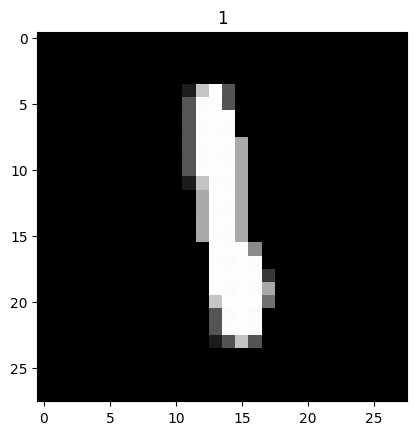

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])

dataset = torchvision.datasets.MNIST('./', transform = ToTensor)
train_set, test_set = torch.utils.data.random_split(dataset, [50000, 10000])

In [12]:
train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=1000,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=1000,
                                          shuffle=True)

In [13]:
class MNISTModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MNISTModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )
        
    def forward(self, x):
#        output = self.model(x)
#        result = F.softmax(output, dim=0)
        result = self.model(x)
        with torch.no_grad():
            value = torch.max(result, 1)[1]
        return result, value

In [14]:
model = MNISTModel(784, 10) # 28x28, 10개 숫자

In [15]:
print(sum(p.numel() for p in model.parameters()))

101770


In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
print(model)

MNISTModel(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [18]:
model = MNISTModel(784, 10) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

n_epochs = 10 # 10회 학습

import time
stime = time.time()

for epoch in range(n_epochs):
    total_loss = 0
    for data, target in train_loader:
        data = data.view(-1, 784)
        y, _ = model(data)
        loss = criterion(y, target).sum()
        total_loss += loss.data
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('epoch {}th loss: {}'.format(epoch, total_loss))

etime = time.time()
elapsed = etime - stime
print('{} sec elapsed.'.format(elapsed))    

epoch 0th loss: 41.29971694946289
epoch 1th loss: 9.709281921386719
epoch 2th loss: 7.288906097412109
epoch 3th loss: 5.974453449249268
epoch 4th loss: 5.230257987976074
epoch 5th loss: 4.7940354347229
epoch 6th loss: 4.5535078048706055
epoch 7th loss: 4.146872043609619
epoch 8th loss: 3.7736291885375977
epoch 9th loss: 3.395655632019043
32.82185196876526 sec elapsed.


In [21]:
model = MNISTModel(784, 10) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

import time
stime = time.time()

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
  
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.view(-1, 784)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1

    n_test = 0
    test_loss = 0
    model.eval()
    for test_data, test_target in test_loader:
        test_data = test_data.reshape(-1, 784)
        y_pred, _ = model(test_data)
        test_loss += criterion(y_pred, test_target).sum().data
        n_test += 1
        
    print('epoch {}th training loss: {} test loss: {}'.format(epoch, train_loss / n_train, test_loss / n_test))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

etime = time.time()
elapsed = etime - stime
print('{} sec elapsed.'.format(elapsed))

epoch 0th training loss: 0.6933959722518921 test loss: 0.22779910266399384
epoch 1th training loss: 0.174087256193161 test loss: 0.18602874875068665
epoch 2th training loss: 0.1359529346227646 test loss: 0.16746273636817932
epoch 3th training loss: 0.11655586212873459 test loss: 0.1603105068206787
epoch 4th training loss: 0.1043011024594307 test loss: 0.17135074734687805
epoch 5th training loss: 0.0979643166065216 test loss: 0.1833992451429367
epoch 6th training loss: 0.08792992681264877 test loss: 0.16672596335411072
epoch 7th training loss: 0.08152851462364197 test loss: 0.18399468064308167
epoch 8th training loss: 0.07119586318731308 test loss: 0.20183733105659485
epoch 9th training loss: 0.0709785521030426 test loss: 0.18675711750984192
38.80772638320923 sec elapsed.


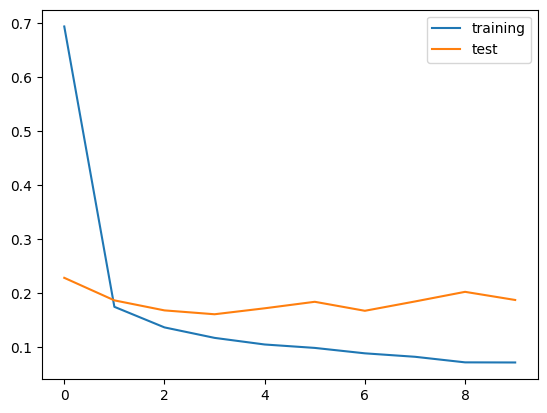

In [22]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
import numpy as np

with torch.no_grad():
    y_test = None
    y_pred = None
    for test_data, test_target in test_loader:
        test_data = test_data.view(-1, 784)
        _, y = model(test_data)
        if None == y_test:
            y_test = test_target
        else:
            torch.cat([y_test, test_target], dim=0)
        if None == y_pred:
            y_pred = y
        else:
            torch.cat([y_pred, y], dim=0)

    score = accuracy_score(y_test, y_pred)
    print(score)

0.958
